__Eithar Elfatih Burie Abdelrahman DS2403__

# Avocado Project

# __1.i Problem Identification__

__Project Description__

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:

    •	Date - The date of the observation
    •	AveragePrice - the average price of a single avocado
    •	type - conventional or organic
    •	year - the year
    •	Region - the city or region of the observation
    •	Total Volume - Total number of avocados sold
    •	4046 - Total number of avocados with PLU 4046 sold
    •	4225 - Total number of avocados with PLU 4225 sold
    •	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip




__________________________

# 1.ii Import necessary libraries

In [2]:
#Import necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
import sklearn
from scipy.stats import skew, stats
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
#read dataset
avo_path='C:\\Users\\eitha\\OneDrive\\Documents\\data science\\datatrained\\flip robo internship\\evaluation projects\\avocado.csv'
#create data frame
df=pd.read_csv(avo_path)


_______

# 2. Load/Read Data

__2.i Head / Tail__

In [18]:
#show dataset head 
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [19]:
#show dataset tail
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


To make more sense of the features, using the given website i will change the column headers to more appropriate titles.

__2.ii Data Structure__

2.ii.i Size, Shape and Columns  

In [20]:
# show size/shapecolumns of our dataset.
print('The dataset has a size of:',df.size)
print('The dataset has a shape:',df.shape)


The dataset has a size of: 255486
The dataset has a shape: (18249, 14)


2.ii.ii DataType

In [21]:
# show data types
print('The data type of each column is as follows:\n',df.dtypes)

The data type of each column is as follows:
 Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


There is a mix of data types, int64, object and float64.  As stated in the problem statment, we will be looking at this in classification as well as regression. 
so we can consider Date, type and region to be categorical feature s

___________________________________________________________________________


2.ii.iii INFO

In [22]:
#Show information about the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


comment:


    - 

__________________________

# 3.Data Pre-processing 


__3.i Duplicates__


In [23]:
#indentify amount of duplicates (if any)
print('From this, we can see there are no duplicates in this data set.')
df.duplicated().sum()

From this, we can see there are no duplicates in this data set.


0

__3.ii Missing Values__

In [24]:
# sum of missing values in data set 
print('From this, we can see there are no missing values in this data set.')
df.isnull().sum()

From this, we can see there are no missing values in this data set.


Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

3.ii.i Heatmap of nulls

<Axes: >

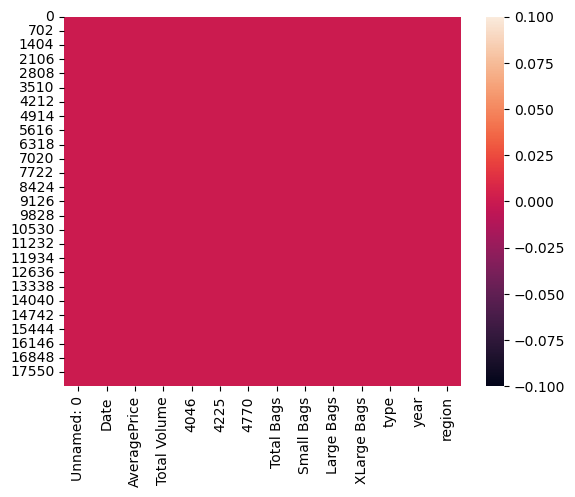

In [25]:
sns.heatmap(df.isna())

__3.ii.ii Summary of data reading__


-All columns are of type 'int 64' and one is  ' float64'. All data is numerical.
-There are no duplicates.
-There are no null values.
-'W' is our target variable. The 16 other variables are independent.

__Action__

-To make all datatypes the same, i will convert all to 'float'

__________

# 3.iii EDA

In [26]:
# show description summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


Initial observations:
    
    - All features are confirmed to have 30 rows, therfore no missing values.
    - All data is positive in nature and has no negative or invalid values to correct.
    - All features have significantly different scales of measure. 
    - There is right skewness apparent in some features as the mean is higher in value than the median in:
    'At Bat', 'Hits' 'Home Runs', 'Complete Game', 'Saves' and 'Errors'  
    - There is left skewness in 'Runs', 'Doubles', 'Triples', 'Vase on Balls', 'Strike Outs', 'Runs Average', 'Earned Runs', 'Earned RunsAverage' and 'Shut Outs' 
    - 'Stole Base' is the only column with equal mean and median of 83.5

actions:

    - Scale unification
    -univariate analysis for visual aid.